# Contratos Públicos Colombia

### Exploración de datos

`contract_data_2016_01_26_clean.json`

Columnas a explorar

* Fecha de inicio de ejecución del contrato
* Plazo de ejecución del contrato
* Fecha de terminación del contrato
* Fecha terminación anormal después de convocado
* Estado del proceso
* Cuantía a contratar
* Cuantía definitiva del contrato
* Liquidación del contrato
* Fecha de liquidación del contrato
* Adición al contrato
* Estado del contrato
* Tipo de terminación del contrato

In [1]:
import pandas as pd
import numpy as np
import ijson as ij
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

ct_data = pd.read_json('contract_data_2016_01_26_clean.json', lines=True)
print(ct_data.head())

  Adición al contrato Adjudicación  \
0                 NaN          NaN   
1                 NaN          NaN   
2          2015-09-14   2014-06-09   
3                 NaN          NaN   
4                 NaN          NaN   

  Calificación definitiva de los proponentes - Orden de elegibilidad  \
0                                                NaN                   
1                                                NaN                   
2                                             [1000]                   
3                                                NaN                   
4                                                NaN                   

      Causal de Otras Formas de Contratación Directa Celebración de Contrato  \
0                                                NaN                     NaN   
1                                                NaN                     NaN   
2                                                NaN              2014-06-27   
3  Prestación de S

In [2]:
ct_data.shape

(1000, 78)

In [3]:
ct_data.columns

Index(['Adición al contrato', 'Adjudicación',
       'Calificación definitiva de los proponentes - Orden de elegibilidad',
       'Causal de Otras Formas de Contratación Directa',
       'Celebración de Contrato', 'Clase', 'Convocatoria',
       'Correo Electrónico', 'Correo Electrónico para el Envío de Expresiones',
       'Creación de Proceso', 'Cuantía Definitiva del Contrato',
       'Cuantía a Contratar', 'Departamento y Municipio de Ejecución',
       'Departamento y Municipio de Entrega Documentos',
       'Departamento y Municipio de Obtención de Documentos',
       'Destinación del Gasto', 'Detalle y Cantidad del Objeto a Contratar',
       'Dirección Fisica de Entrega de Expresiones',
       'Dirección Física de Entrega de Documentos del Proceso',
       'Dirección Física de Obtención de Documentos del Proceso',
       'Dirección Física del Contratista', 'Estado del Contrato',
       'Estado del Proceso', 'Familia',
       'Fecha Inicio de entrega de Expresiones',
       'Fec

In [4]:
ct_data_res = ct_data.loc[:,
    (
        'Departamento y Municipio de Ejecución',
        'Tipo de Contrato',
        'Cuantía a Contratar',
        'Cuantía Definitiva del Contrato',
        'Plazo de Ejecución del Contrato',
        'Segmento',
        'Estado del Contrato',
        'Estado del Proceso',
        'Fecha de Inicio de Ejecución del Contrato',
        'Fecha de Terminación del Contrato',
        'Fecha Terminación Anormal Después de Convocado',
        'Liquidación de Contrato',
        'Fecha de Liquidación del Contrato',
        'Tipo de Terminación del Contrato',
        'Adición al contrato'
    )
]
ct_data_res.head()

,Departamento y Municipio de Ejecución,Tipo de Contrato,Cuantía a Contratar,Cuantía Definitiva del Contrato,Plazo de Ejecución del Contrato,Segmento,Estado del Contrato,Estado del Proceso,Fecha de Inicio de Ejecución del Contrato,Fecha de Terminación del Contrato,Fecha Terminación Anormal Después de Convocado,Liquidación de Contrato,Fecha de Liquidación del Contrato,Tipo de Terminación del Contrato,Adición al contrato
0,"antioquia, medellín",Prestación de Servicios,1.863179e+08,1.863179e+08,90.0,"[80] Servicios de Gestion, Servicios Profesion...",Liquidado,Liquidado,2008-10-03,NaN,NaN,2010-11-09,2009-11-03,Normal,NaN
1,"cundinamarca, ricaurte",Prestación de Servicios,1.500000e+07,1.500000e+07,180.0,[91] Servicios Personales y Domésticos,Liquidado,Liquidado,2010-01-28,NaN,NaN,2010-08-09,2010-07-30,Normal,NaN
2,"sucre, majagual, san onofre, san benito abad",Obra,4.990337e+09,4.990337e+09,240.0,"[72] Servicios de Edificación, Construcción de...",Celebrado,Celebrado,2014-06-13,NaN,NaN,NaN,NaN,NaN,2015-09-14
3,"caldas, manzanares",Prestación de Servicios,2.800000e+07,2.800000e+06,60.0,[85] Servicios de Salud,Liquidado,Liquidado,2014-05-01,2014-06-30,NaN,2014-11-13,2014-08-30,Normal,NaN
4,"cundinamarca, tolemaida",Suministro,3.600000e+07,3.600000e+07,30.0,"[72] Servicios de Edificación, Construcción de...",Celebrado,Celebrado,2012-09-21,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ct_data['Cuantía a Contratar'].describe()

count    9.990000e+02
mean     2.646906e+08
std      3.966758e+09
min      0.000000e+00
25%      4.000000e+06
50%      1.384181e+07
75%      4.294708e+07
max      1.233131e+11
Name: Cuantía a Contratar, dtype: float64

In [6]:
ct_data_res['Tipo de Contrato'].describe()

count                         999
unique                         10
top       Prestación de Servicios
freq                          475
Name: Tipo de Contrato, dtype: object

In [7]:
ct_types = ct_data_res['Tipo de Contrato'].value_counts()
print(ct_types.index)

Index(['Prestación de Servicios', 'Suministro', 'Obra', 'Compraventa',
       'Otro Tipo de Contrato', 'Arrendamiento', 'Consultoría',
       'Interventoría', 'Comodato', 'Acuerdo Marco'],
      dtype='object')


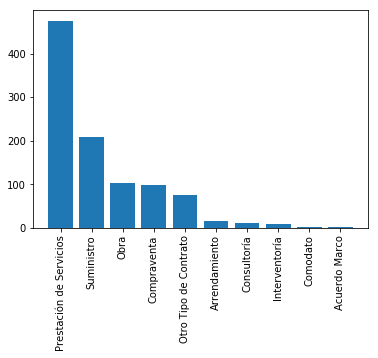

In [18]:
ct_types_X = ct_types.index
ct_types_y = ct_types

plt.bar(ct_types_X,ct_types_y)
plt.xticks(rotation=90)
plt.show()

In [9]:
ct_data['Segmento'].describe()

count                                                   999
unique                                                   50
top       [72] Servicios de Edificación, Construcción de...
freq                                                    124
Name: Segmento, dtype: object

In [10]:
ct_data['Plazo de Ejecución del Contrato'].describe()

count     835.000000
mean      145.473054
std       386.138480
min         0.000000
25%        23.000000
50%        87.000000
75%       185.000000
max      9450.000000
Name: Plazo de Ejecución del Contrato, dtype: float64

In [11]:
ct_data['Plazo de Ejecución del Contrato'].value_counts()

30.0     109
180.0     55
90.0      47
60.0      46
120.0     40
5.0       36
15.0      33
150.0     31
240.0     28
3.0       22
10.0      21
20.0      21
210.0     20
300.0     20
360.0     20
270.0     19
8.0       18
1.0       15
330.0     14
2.0       14
45.0      11
6.0        7
4.0        5
75.0       4
11.0       3
47.0       3
255.0      3
320.0      3
33.0       3
103.0      3
        ... 
119.0      1
945.0      1
670.0      1
292.0      1
50.0       1
263.0      1
80.0       1
342.0      1
26.0       1
382.0      1
570.0      1
25.0       1
208.0      1
231.0      1
600.0      1
355.0      1
67.0       1
108.0      1
110.0      1
58.0       1
96.0       1
284.0      1
12.0       1
306.0      1
7.0        1
212.0      1
296.0      1
70.0       1
52.0       1
289.0      1
Name: Plazo de Ejecución del Contrato, Length: 158, dtype: int64

In [12]:
ct_data_st = ct_data['Departamento y Municipio de Ejecución']
print(ct_data_st.head())

0                             antioquia, medellín
1                          cundinamarca, ricaurte
2    sucre, majagual, san onofre, san benito abad
3                              caldas, manzanares
4                         cundinamarca, tolemaida
Name: Departamento y Municipio de Ejecución, dtype: object


In [13]:
ct_data['Departamento y Municipio de Ejecución'].describe()

count                          999
unique                         419
top       bogotá d.c., bogotá d.c.
freq                           157
Name: Departamento y Municipio de Ejecución, dtype: object

In [20]:
ct_state = ct_data_res['Departamento y Municipio de Ejecución'].value_counts()
print(ct_state.index[:10])

Index(['bogotá d.c., bogotá d.c.', 'antioquia, medellín',
       'valle del cauca, cali', 'meta, villavicencio',
       'santander, bucaramanga', 'bolívar, cartagena', 'tolima, ibagué',
       'nariño, pasto', 'atlántico, barranquilla', 'cauca, popayán'],
      dtype='object')


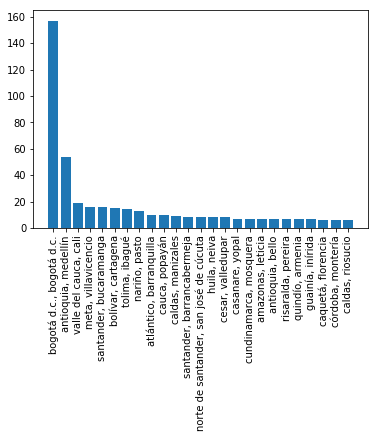

In [23]:
ct_state_x = ct_state.index[:25]
ct_state_y = ct_state[:25]

plt.bar(ct_state_x,ct_state_y)
plt.xticks(rotation=90)
plt.show()

In [14]:
ct_data_res['Fecha de Inicio de Ejecución del Contrato'] = pd.to_datetime(ct_data_res['Fecha de Inicio de Ejecución del Contrato'])
ct_data_res['Fecha de Liquidación del Contrato'] = pd.to_datetime(ct_data_res['Fecha de Liquidación del Contrato'])
ct_data_res['Duración real del contrato (dias)'] = ct_data_res['Fecha de Liquidación del Contrato'].sub(ct_data_res['Fecha de Inicio de Ejecución del Contrato'], axis=0)
ct_data_res['Duración real del contrato (dias)'] = ct_data_res['Duración real del contrato (dias)'] / np.timedelta64(1, 'D')
ct_data_res.head()

,Departamento y Municipio de Ejecución,Tipo de Contrato,Cuantía a Contratar,Cuantía Definitiva del Contrato,Plazo de Ejecución del Contrato,Segmento,Estado del Contrato,Estado del Proceso,Fecha de Inicio de Ejecución del Contrato,Fecha de Terminación del Contrato,Fecha Terminación Anormal Después de Convocado,Liquidación de Contrato,Fecha de Liquidación del Contrato,Tipo de Terminación del Contrato,Adición al contrato,Duración real del contrato (dias)
0,"antioquia, medellín",Prestación de Servicios,1.863179e+08,1.863179e+08,90.0,"[80] Servicios de Gestion, Servicios Profesion...",Liquidado,Liquidado,2008-10-03,NaN,NaN,2010-11-09,2009-11-03,Normal,NaN,396.0
1,"cundinamarca, ricaurte",Prestación de Servicios,1.500000e+07,1.500000e+07,180.0,[91] Servicios Personales y Domésticos,Liquidado,Liquidado,2010-01-28,NaN,NaN,2010-08-09,2010-07-30,Normal,NaN,183.0
2,"sucre, majagual, san onofre, san benito abad",Obra,4.990337e+09,4.990337e+09,240.0,"[72] Servicios de Edificación, Construcción de...",Celebrado,Celebrado,2014-06-13,NaN,NaN,NaN,NaT,NaN,2015-09-14,NaN
3,"caldas, manzanares",Prestación de Servicios,2.800000e+07,2.800000e+06,60.0,[85] Servicios de Salud,Liquidado,Liquidado,2014-05-01,2014-06-30,NaN,2014-11-13,2014-08-30,Normal,NaN,121.0
4,"cundinamarca, tolemaida",Suministro,3.600000e+07,3.600000e+07,30.0,"[72] Servicios de Edificación, Construcción de...",Celebrado,Celebrado,2012-09-21,NaN,NaN,NaN,NaT,NaN,NaN,NaN


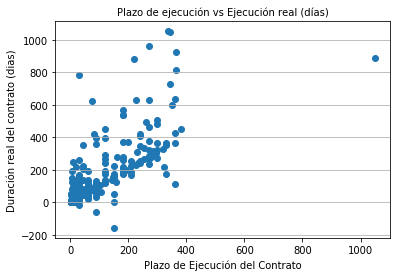

In [25]:
fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Plazo de ejecución vs Ejecución real (días)',fontsize=10)
axis.set_xlabel('Plazo de Ejecución del Contrato',fontsize=10)
axis.set_ylabel('Duración real del contrato (dias)',fontsize=10)

X = ct_data_res['Plazo de Ejecución del Contrato']
Y = ct_data_res['Duración real del contrato (dias)']

axis.scatter(X, Y)
plt.show()